# Video Lesson \#16

## Part 1: Functions

### About this data: 
There are 6 netCDF files in the `ARGO_floatdata` folder. \
Each netCDF file corresponds to a single profile made by Argo float number 59011095. We will be using all of these files to learn __functions__.

__File names:__
- D59011095_185.nc
- D59011095_186.nc
- D59011095_187.nc
- D59011095_188.nc
- D59011095_189.nc
- D59011095_190.nc

In [1]:
# Import statements
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Old method using copy/paste

In [2]:
filepath ='ARGO_floatdata/'
filename = 'D5901105_185.nc'

In [3]:
# Import just one data file using xarray
data = xr.open_dataset(filepath + filename)
# display(data)

# Reformat the data to remove singleton dimensions
data = data.squeeze()
display(data)

# Get the lat and lon
lon = data['LONGITUDE'].values
lat = data['LATITUDE'].values

# Get the temperature and pressure
T = data['TEMP'].values
P = data['PRES'].values

<xarray.Dataset>
Dimensions:                       (N_PARAM: 4, N_LEVELS: 75, N_HISTORY: 4)
Dimensions without coordinates: N_PARAM, N_LEVELS, N_HISTORY
Data variables: (12/70)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY) object ...
    HISTORY_PARAMETER             (N_HISTORY) object ...
    HISTORY_START_PRES            (N_HISTORY) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY) float32 ...
    HISTORY_QCTEST                (N_HISTORY) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2019-04-06T02:00:49Z creation
    references:           http://www.argodatamgt.org/Documentation
    comment:              free text
    user_manual_version:  3.2
    Conventions:          Argo-3.2 CF-1.6
    featureType:          trajectoryProfile

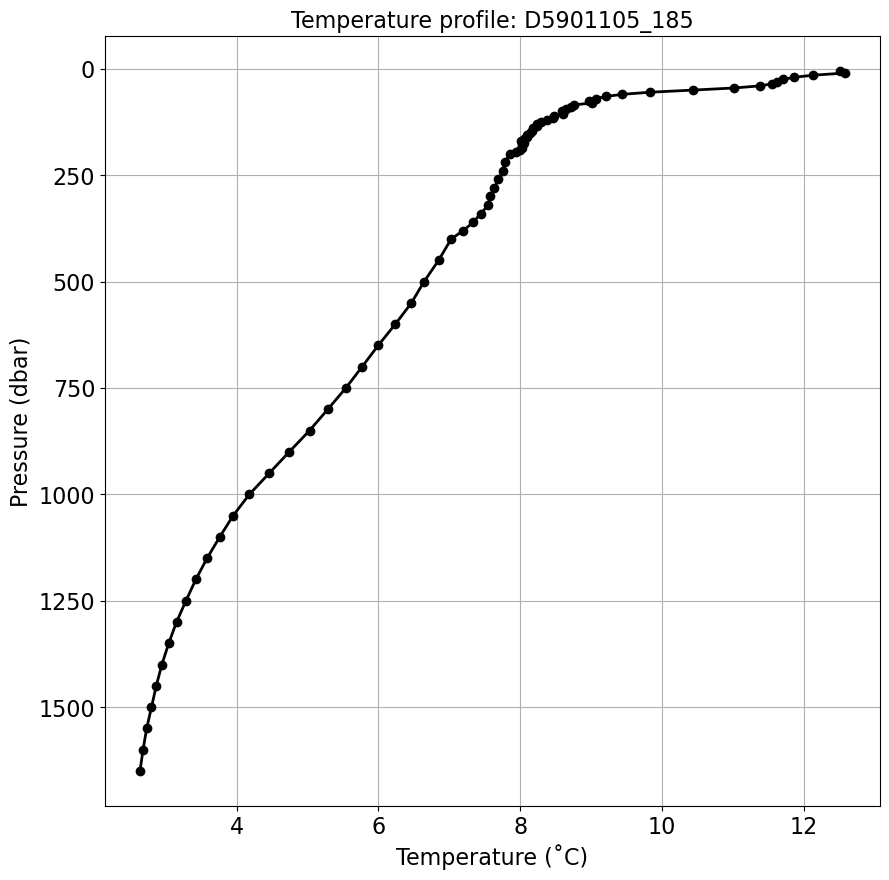

In [4]:
# Plot the temperature profile
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

# Make the plot
ax.plot(T, P, color='k', ls='-', lw=2, marker='o', label='Temperature')

# Format everything
ax.invert_yaxis()
ax.grid()
ax.set_xlabel('Temperature (˚C)', fontsize=16)
ax.set_ylabel('Pressure (dbar)', fontsize=16)
ax.set_title('Temperature profile: '+filename.split('.')[0], 
             fontsize=16)
# increase font size of axis tick numbers
ax.tick_params(axis='both', labelsize=16)

#plt.savefig('T_profile_185.png')

### New method using functions

In [5]:
# Create a function for reading the data
def prof_getdata(filepath, filename):
    # Load the file
    data = xr.open_dataset(filepath+filename)
    data = data.squeeze()

    # Get the data
    lat = data['LATITUDE'].values
    lon = data['LONGITUDE'].values
    T = data['TEMP'].values
    P = data['PRES'].values

    return T, P, lon, lat


# Create a function for plotting the temperature profile
def prof_plotting(T, P, filename, c='k', lw=2):
    # Plot the temperature profile
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    
    # Make the plot
    ax.plot(T, P, color=c, ls='-', lw=lw, marker='o', label='Temperature')
    
    # Format everything
    ax.invert_yaxis()
    ax.grid()
    ax.set_xlabel('Temperature (˚C)', fontsize=16)
    ax.set_ylabel('Pressure (dbar)', fontsize=16)
    ax.set_title('Temperature profile: '+filename.split('.')[0], 
                 fontsize=16)
    # increase font size of axis tick numbers
    ax.tick_params(axis='both', labelsize=16)



In [6]:
# Get the file information for all the files
filepath = 'ARGO_floatdata/'
# filename = 'D5901105_186.nc'

filenames = ['D5901105_185.nc','D5901105_186.nc','D5901105_187.nc',
             'D5901105_188.nc','D5901105_189.nc','D5901105_190.nc']

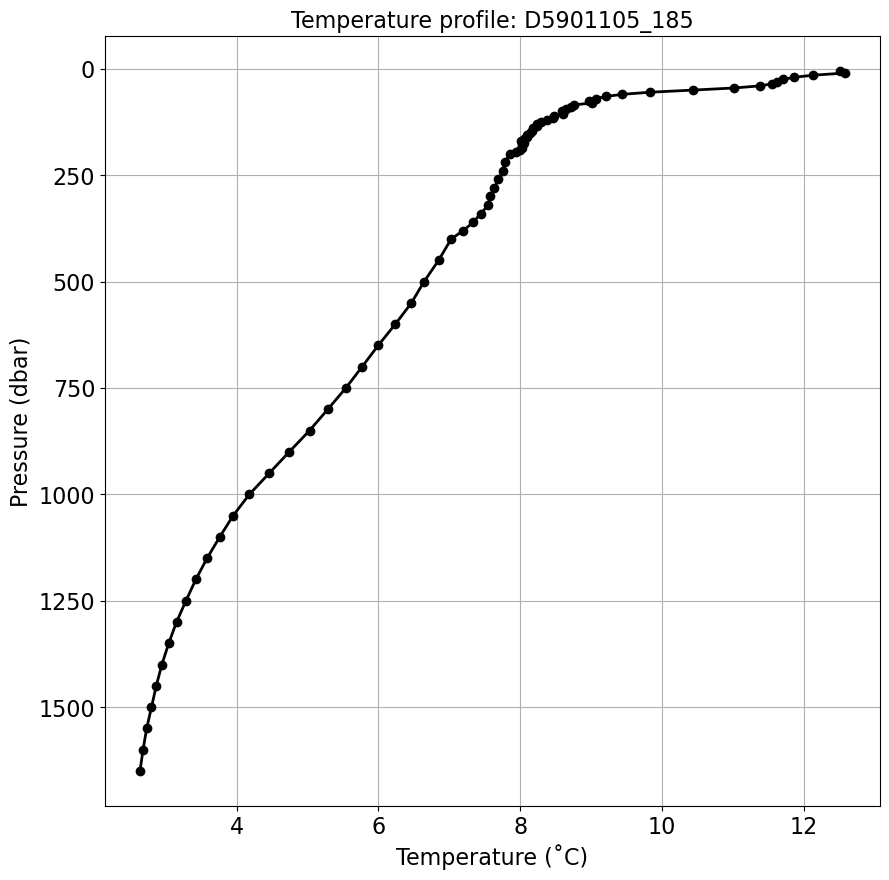

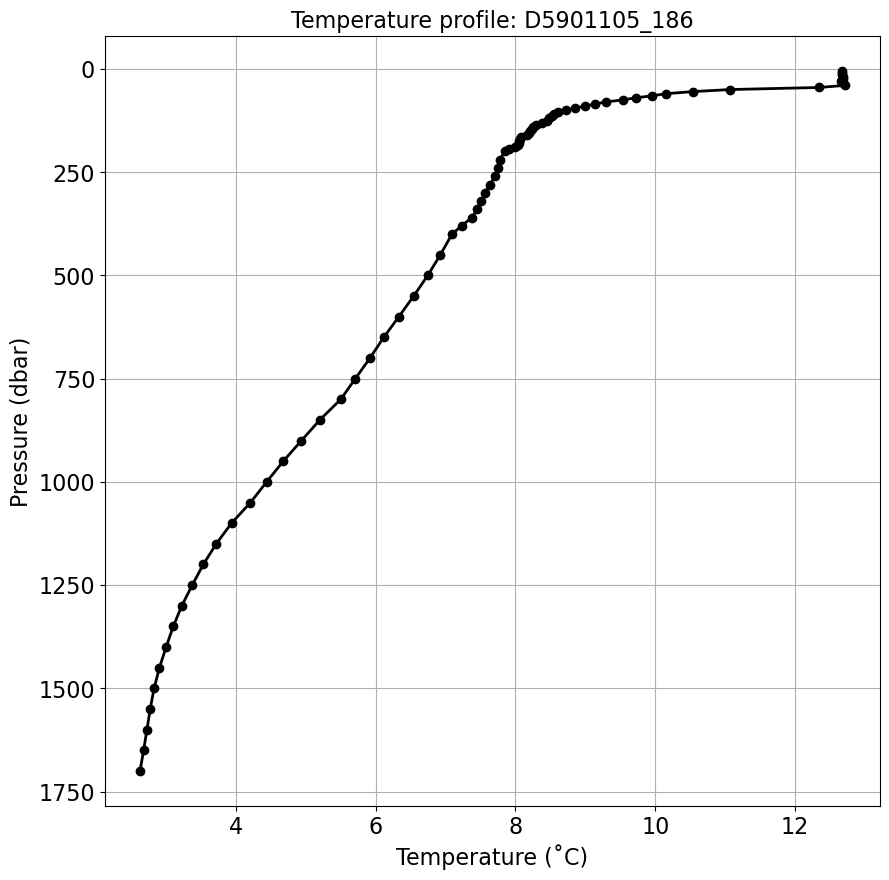

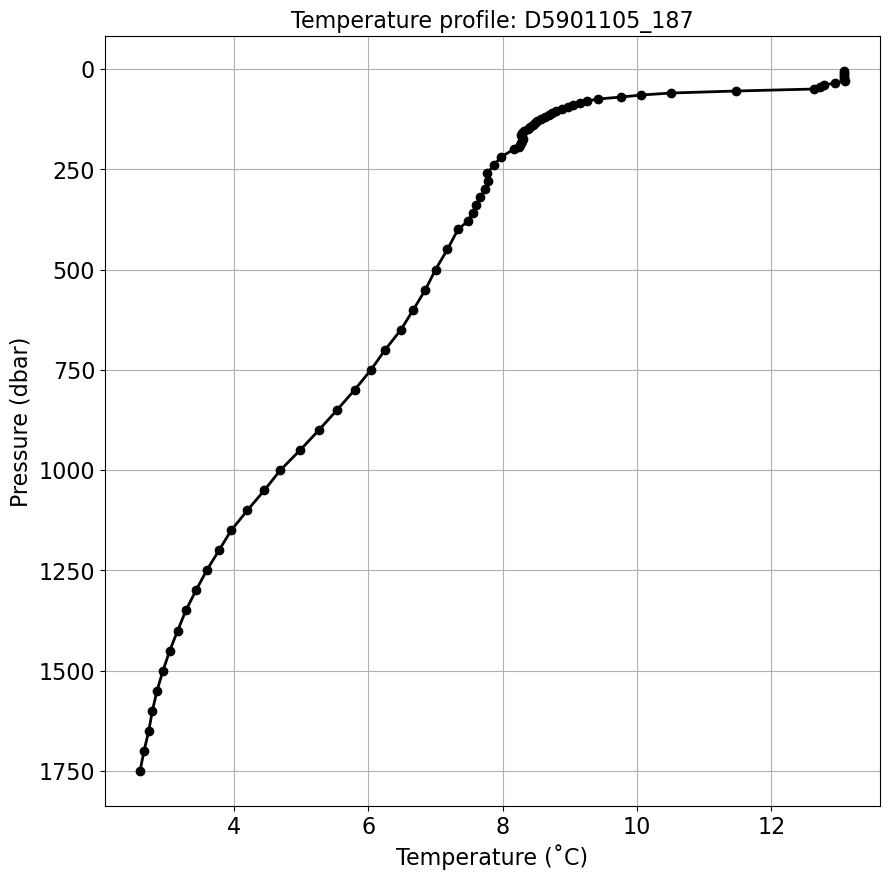

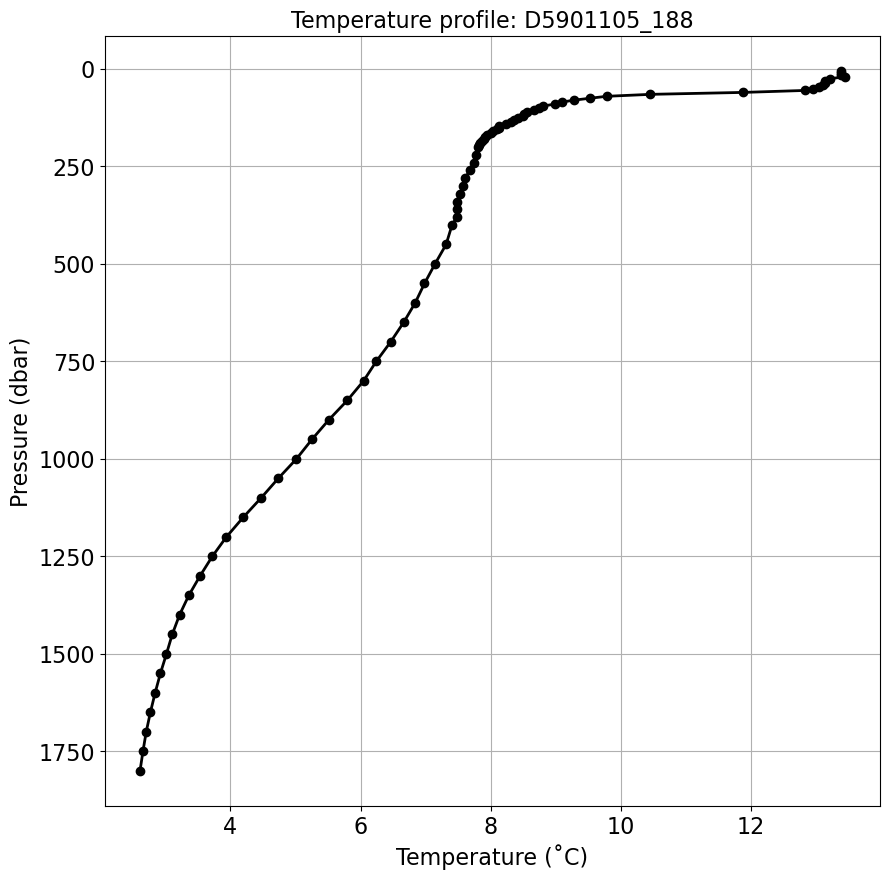

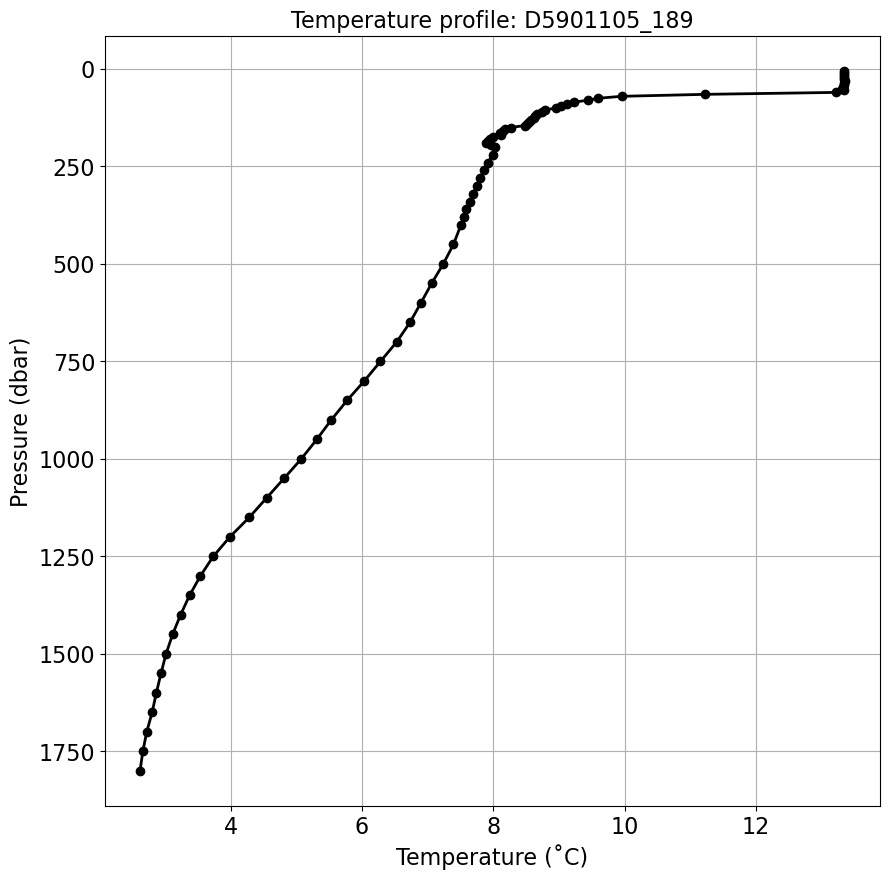

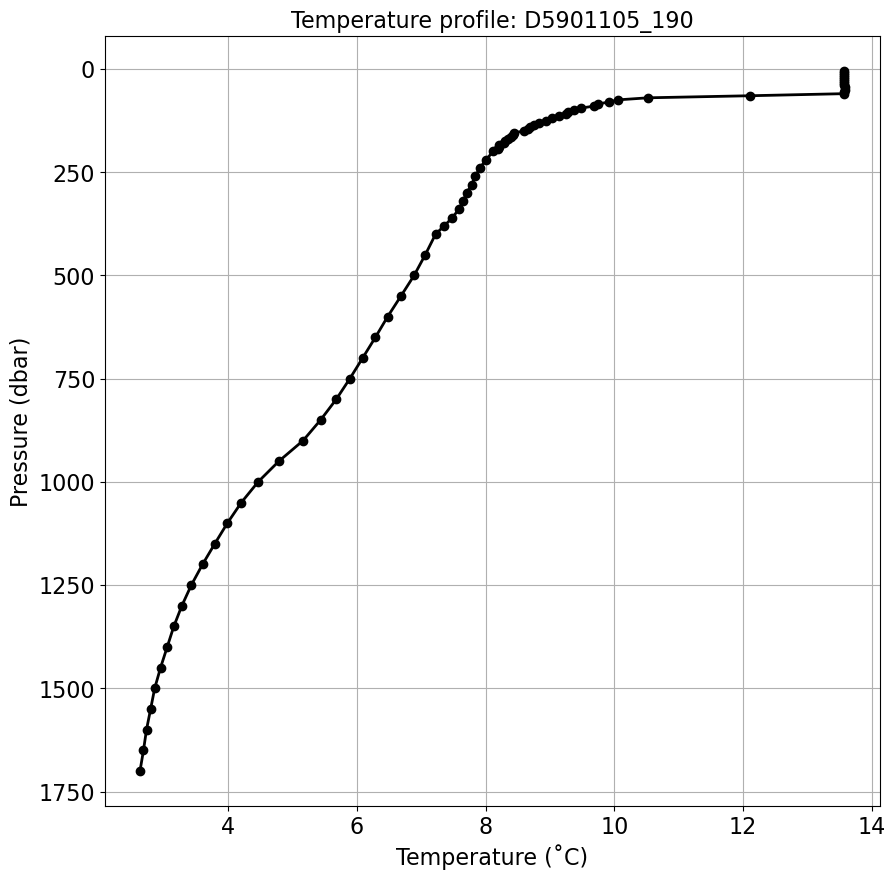

In [7]:
# Use the functions you just created in a for loop
for index in range(0, 6):
    T, P, lon, lat = prof_getdata(filepath, filenames[index])
    prof_plotting(T,P,filenames[index])
    # print(T)